 
## Example 1 - Gold vs. Gold Mining##

*****

## Execute each cell by clicking on it and pressing shift + enter.

******

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import Quandl as q

miners = q.get('GOOG/AMEX_GDX', trim_start='2006-06-01', trim_end='2016-06-01')
#from https://www.quandl.com/data/GOOG/AMEX_GDX-Market-Vectors-Gold-Miners-ETF-GDX
gold = q.get('GOOG/NYSEARCA_GLD', trim_start='2006-06-01', trim_end='2016-06-01')
#https://www.quandl.com/data/GOOG/NYSEARCA_GLD-SPDR-Gold-Trust-ETF-GLD

In [2]:
gold.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-06-01,62.12,62.97,61.80,62.56,10665500.0
2006-06-02,63.10,63.59,62.53,63.50,5835300.0
2006-06-05,63.82,64.19,63.15,63.29,5565500.0
2006-06-06,62.58,62.67,62.16,62.55,5813800.0
2006-06-07,61.55,62.85,61.35,62.28,9754900.0


In [3]:
miners.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-06-01,37.20,38.58,37.17,38.53,640800.0
2006-06-02,39.31,39.39,38.80,39.13,275300.0
2006-06-05,40.27,40.27,38.10,38.13,435000.0
2006-06-06,38.03,38.03,36.72,37.01,663600.0
2006-06-07,36.31,37.55,35.82,36.14,484100.0


Indeed, the above data both have the same dates. We now save them into a pickle file.

In [4]:
import pickle

with open('GLD.pickle','wb') as f:
    pickle.dump(gold, f)
GLD_in = open('GLD.pickle','rb') #read
GLD_data = pickle.load(GLD_in)

with open('GDX.pickle','wb') as f:
    pickle.dump(miners, f)
GDX_in = open('GDX.pickle','rb') #read
GDX_data = pickle.load(GDX_in)

In [5]:
miners = pd.DataFrame(GDX_data['Close'], index=GDX_data.index)
gold = pd.DataFrame(GLD_data['Close'], index=GLD_data.index)

#data['GDX']=pd.DataFrame(miners, index=miners.index)
#data['GLD']=pd.DataFrame(gold, index=gold.index)

Let's concatenate the two columns and rename 'Close'. 

In [6]:
data = pd.concat([miners, gold], axis=1, join='inner')
data.columns = ['GDX', 'GLD']

In [7]:
data.head()

,GDX,GLD
Date,,
2006-06-01,38.53,62.56
2006-06-02,39.13,63.50
2006-06-05,38.13,63.29
2006-06-06,37.01,62.55
2006-06-07,36.14,62.28


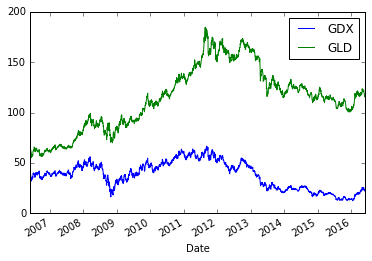

In [8]:
#ax = plt.figure(1)
data.plot();

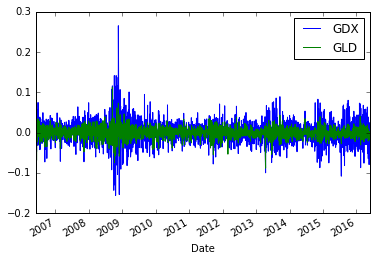

In [9]:
returns = data.pct_change().dropna()
returns.plot();

****
Research is great for finding correlations among equities. The data above, plots `$GLD`, an ETF for the price of gold, against `$GDX`, an ETF looking at the gold mining industry.

****
To continue the analysis, we can import Seaborn, a statistical plotting library to use the distplot function. This allows us to plot the distribution of returns for `$GDX`
****

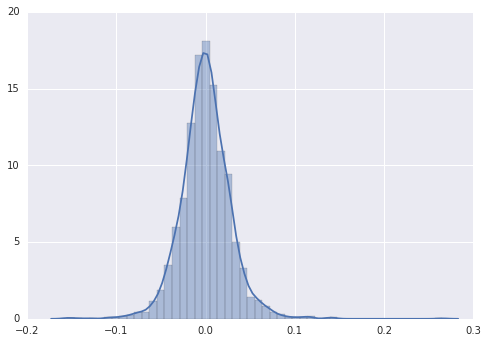

In [10]:
import seaborn as sns

sns.distplot(returns.iloc[:,0:1]);

************
We can also review the correlation between `$GLD` and `$GDX` by running a linear regression and plotting the best fitting line, the confidence interval (shaded regions) and the Pearson regression coefficient as well as p-value.
************

ValueError: Argument dimensions are incompatible

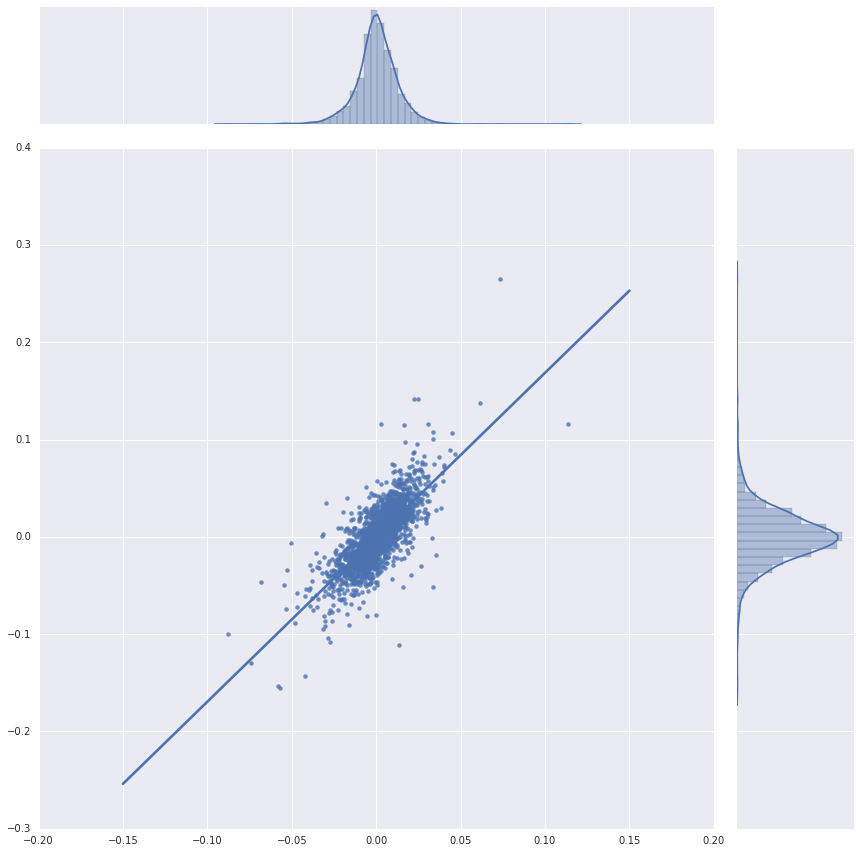

In [25]:
#Get the historical close prices for USO and ITA individually

#GLD = get_pricing(symbols(gold),
#            fields='close_price',
#            start_date='2007-01-02',
#            end_date='2014-12-31')

#GDX = get_pricing(symbols(miners),
#            fields='close_price',
#            start_date='2007-01-02',
#            end_date='2014-12-31')

#Calculate the returns for each
returns_GLD = gold.pct_change().dropna()
returns_GDX = miners.pct_change().dropna()

#Plot using Seaborn's jointplot function
sns.jointplot(returns_GLD, returns_GDX, kind='reg', size=12)

Note that the length of the data should be equal and their column names must be the same i.e. ['Close'].

In [19]:
len(returns_GLD),  len(returns_GDX)

(2531, 2531)

*******

From these graphs, you can begin to analyze if there is a possible opportunity to invest in the correlation between the gold and gold miner industries. 

If you return to the first cell, you can try out different combinations of stocks to look for something more or less correlated. Perhaps `$AAPL` and `$HPQ` or `$PEP` and `$KO`? 

********
# Example 2 - US Housing vs. S&P  500

We can also import external data and compare it to historical market data.

In this case, we've taken a csv showing housing price data from Quandl (https://www.quandl.com/FRED/ASPNHSUS-Average-Sales-Price-for-New-Houses-Sold-in-the-United-States,) stored the data in the /data directory in Quantopian research.

**********

In [40]:
import matplotlib.pyplot as pyplot

# Load the average sales prices of US homes from the csv residing in your data directory
us_housing_prices = q.get('FRED/ASPNHSUS', trim_start='2002-01-01', trim_end = '2014-12-31').sort_index(ascending=True)
    
# Get the historical prices for SPY, the ETF for the S&P 500
spy_daily_prices = q.get('GOOG/NYSE_SPY', trim_start='2002-01-01', trim_end = '2014-12-31', collapse='daily')
#https://www.quandl.com/data/GOOG/NYSE_SPY-SPDR-S-P-500-ETF-SPY

In [42]:
us_housing_prices.head()

,VALUE
DATE,
2002-01-01,226900.0
2002-02-01,226500.0
2002-03-01,227100.0
2002-04-01,228100.0
2002-05-01,226500.0


In [43]:
spy_daily_prices.head()

,Open,High,Low,Close,Volume
Date,,,,,
2002-01-02,115.11,115.75,113.81,115.53,24255600.0
2002-01-03,115.65,116.95,115.54,116.84,15388500.0
2002-01-04,117.17,117.98,116.55,117.62,19943400.0
2002-01-07,117.70,117.99,116.56,116.79,12793200.0
2002-01-08,116.80,117.06,115.97,116.52,12646900.0


Again, let's pickle the data.

In [44]:
import pickle

with open('US_housing_prices.pickle','wb') as f:
    pickle.dump(us_housing_prices, f)
USHP_in = open('US_housing_prices.pickle','rb') #read
us_housing_prices = pickle.load(USHP_in)

with open('SPY_daily_prices.pickle','wb') as f:
    pickle.dump(spy_daily_prices, f)
SPYdP_in = open('SPY_daily_prices.pickle','rb') #read
spy_daily_prices = pickle.load(SPYdP_in)

Obtain only the Close price of SPY daily prices.

In [45]:
spy_daily_prices = spy_daily_prices['Close']

In [47]:
# Normalize the data for easy comparison
spy_daily_prices = spy_daily_prices/spy_daily_prices.iloc[0] #iloc= index location
us_housing_prices = us_housing_prices/us_housing_prices.iloc[0]

data = pd.concat([spy_daily_prices, us_housing_prices], axis=1, join='inner')
data.columns = ['S&P 500 (SPY ETF)', 'US Average Housing Price']

# Plot them together with matplotlib
#us_housing_prices.plot(label="US Average Housing Price")
#spy_daily_prices.plot(label="S&P 500 (SPY ETF)")

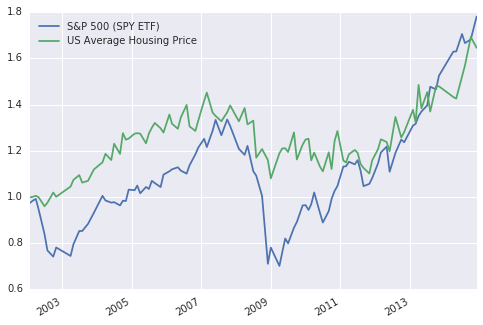

In [54]:
data.plot();

In [66]:
np.convolve(returns['S&P 500 (SPY ETF)'], returns['US Average Housing Price']);

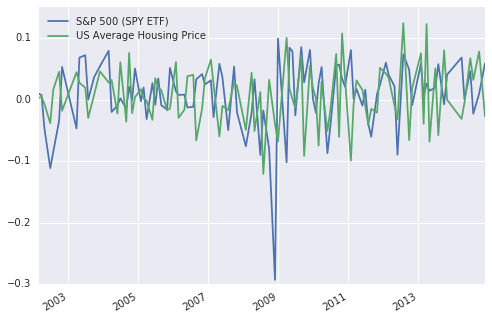

In [67]:
returns = data.pct_change().dropna()
returns.plot();

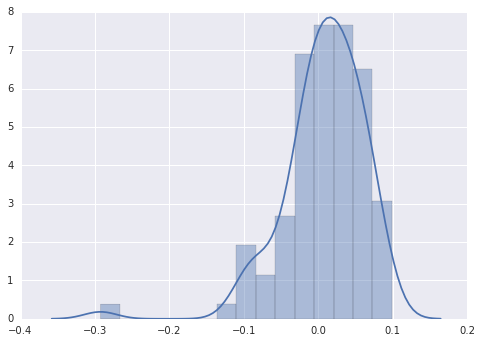

In [68]:
import seaborn as sns

sns.distplot(returns.iloc[:,0:1]);

It seems the distribution is a little skewed towards left. 